In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab.patches import
from skimage.feature import match_template
import os
from skimage.feature import peak_local_max


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
8.74015769675926


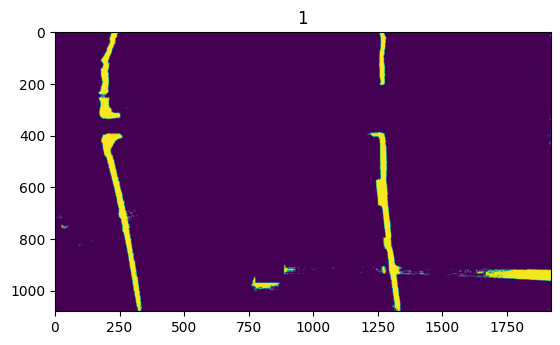

[[244 244 246 ... 240 240 241]
 [242 242 241 ...   0 239 241]
 [241 243 242 ... 239 240 242]
 ...
 [242 245 244 ... 247 246 247]
 [242 246 247 ... 249 248 247]
 [245 246 247 ... 249 250 250]]
18.513804494598766


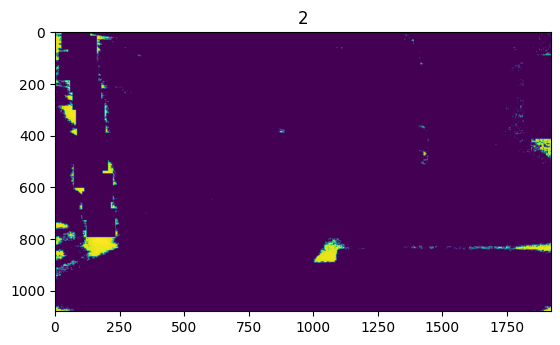

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 242 242 241]
 [  0   0   0 ... 243 242 240]
 [  0   0   0 ... 244 241 239]]
17.61368682484568


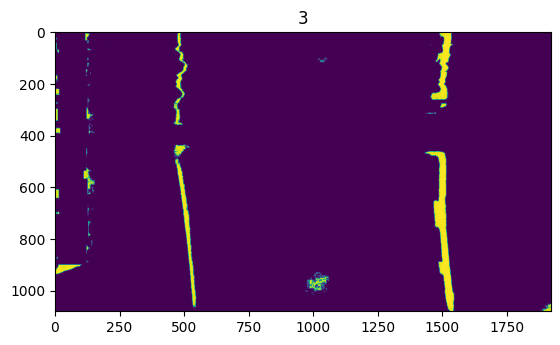

[[  0   0   0 ... 246 247 246]
 [  0   0   0 ... 244 244 244]
 [232 230   0 ... 242 239 241]
 ...
 [233 235 235 ... 249 247 249]
 [235 237 235 ... 247 242 246]
 [234 235 233 ... 243 237 236]]
24.40729118441358


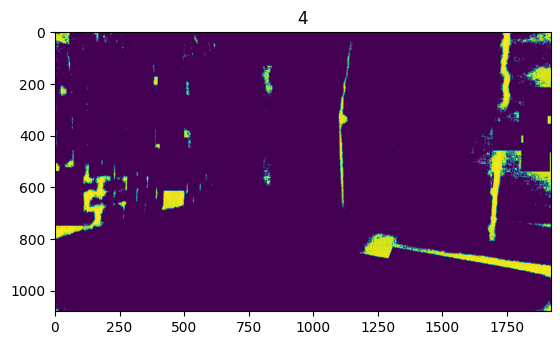

[[233 227   0 ... 251 251 251]
 [231 230 229 ... 252 251 252]
 [227 227 228 ... 250 248 249]
 ...
 [254 255 255 ... 254 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 254 ... 254 253 253]]
33.47546633873457


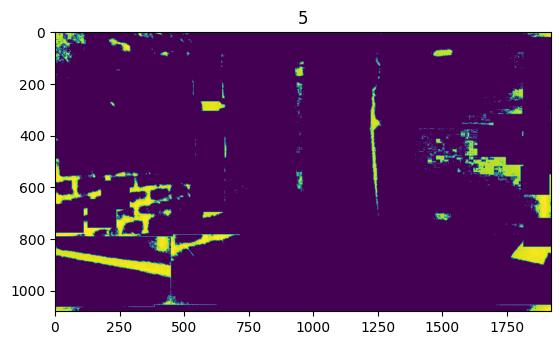

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
11.67467544367284


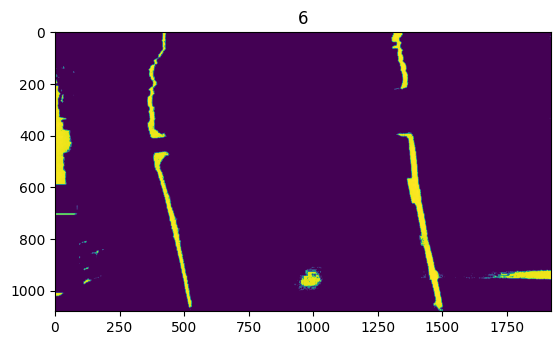

[[254 253 253 ...   0   0   0]
 [254 253 253 ...   0   0   0]
 [253 253 253 ...   0   0   0]
 ...
 [  0   0   0 ... 243 244 245]
 [  0   0   0 ... 245 246 247]
 [  0   0   0 ... 245 247 247]]
13.81949604552469


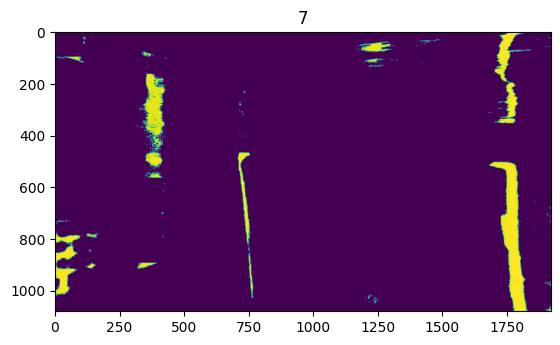

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 240 240   0]
 [  0   0   0 ... 240 240 240]
 [  0   0   0 ... 241 240 240]]
16.087206790123457


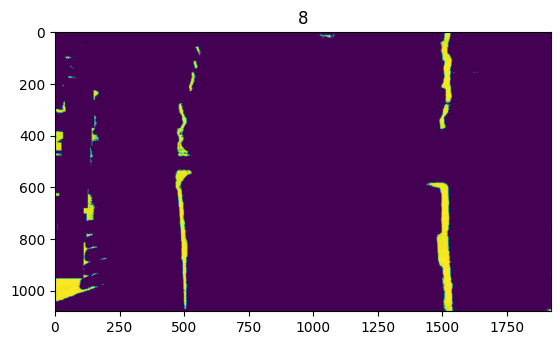

[[240 240 240 ...   0   0   0]
 [240 240 240 ...   0   0   0]
 [240 240 240 ...   0   0   0]
 ...
 [244 241 240 ...   0   0   0]
 [241   0   0 ...   0   0   0]
 [247 241   0 ... 238 238 238]]
17.321979166666665


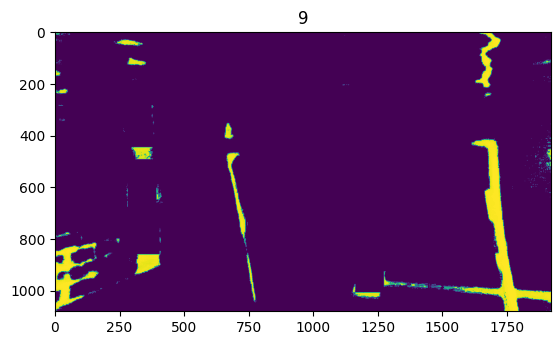

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [254 255 255 ... 255 255 255]
 [253 254 255 ... 255 255 255]
 [254 255 255 ... 255 255 255]]
6.558044463734568


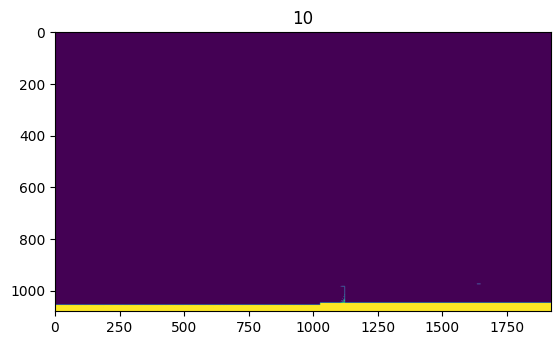

[[254 254 254 ... 249 248 249]
 [254 254 254 ... 248 247 247]
 [254 254 254 ... 249 248 246]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 254 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
18.664062017746915


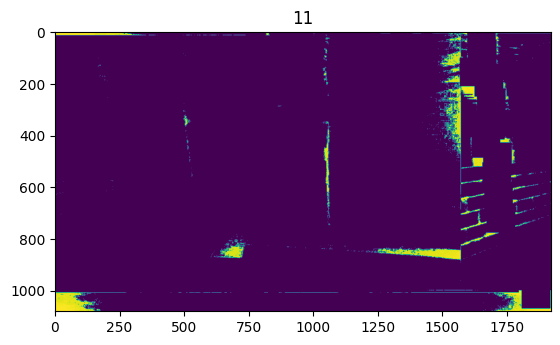

[[255 255 255 ... 235 255 255]
 [255 255 255 ... 255 255 251]
 [255 255 255 ... 255 240 251]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
243.03948977623457


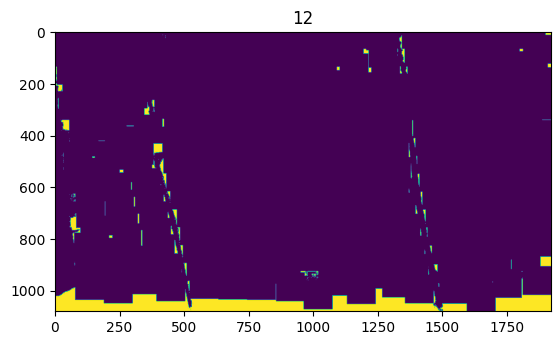

In [6]:
c=0
dir='/content/drive/MyDrive/OutputImages_01'  #put folder wiht images
for img_name in os.listdir(dir):
  plt.figure()
  c=c+1
  #create image path
  path=os.path.join(dir,img_name)
  img=cv2.imread(path)
  #make rgb from bgr
  img_bgr=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img_bgr)
  plt.title(f'{c}')
  #sharpening the image
  sharpen_filter=np.array([[-1,-1,-1],
                 [-1,11.3,-1],
                [-1,-1,-1]])
  img_bgr=cv2.filter2D(img_bgr,-1,sharpen_filter)
  plt.imshow(img_bgr)
  plt.title(f'{c}')
  #extract blue channel only
  blue=img_bgr[:,:,2]
  plt.imshow(blue)
  plt.title(f'{c}')
  #increase contrast by hist equalization
  equ=cv2.equalizeHist(blue)
  plt.imshow(equ)
  inverted_equ=cv2.bitwise_not(equ)

  plt.title(f'{c}')
  # sharpen_filter2=np.array([[-1,-1,-1,-1,-1],
  #                         [-1,+1,+1,1,-1],
  #                         [-1,1,2,1,-1],
  #                         [-1,1,2,1,-1],
  #                         [-1,1,2,1,-1]])
  # filter_final=cv2.filter2D(inverted_equ,-1,sharpen_filter2)
  #plt.imshow(filter_final)

  print(inverted_equ)
  print(inverted_equ.mean())
  height, width = inverted_equ.shape
 #The following piece of code iterates over each pixel and deletes area around the pixel
 #if the sum of intensitites is above a certain threshold given by nsize*nsize*desired intnesity
# Iterate over x, y coordinates
  for y in range(height):
    for x in range(width):
      #cv2.circle(edge2,(x,y),10,255,-1)
      neighborhood_size = 110
      half_size = neighborhood_size // 2
      neighborhood_x = slice(max(0, x - half_size), min(inverted_equ.shape[1], x + half_size + 1))
      neighborhood_y = slice(max(0, y - half_size), min(inverted_equ.shape[0], y + half_size + 1))
      # Set the values in the neighborhood to 0
      if(inverted_equ[neighborhood_y, neighborhood_x]).sum() >= neighborhood_size*neighborhood_size *160 :
        inverted_equ[neighborhood_y, neighborhood_x]=0
  plt.imshow(inverted_equ)
  plt.show()

In [ ]:
[[-1,-1,-1, ],
 [-1,2,2,-1  ],
 [-1,2,2,-1 ]
 [-1,-1,-1,-1]]